In [13]:
! pip install skops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.2/131.2 kB 4.0 MB/s eta 0:00:00


In [1]:
! rm -rf sample_data

In [2]:
! mkdir Data

In [3]:
! cp /content/drug.csv Data

In [4]:
import pandas as pd

drug_df = pd.read_csv("Data/drug.csv")
drug_df = drug_df.sample(frac=1)
drug_df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
148,61,F,LOW,NORMAL,7.340,drugX
40,73,F,NORMAL,HIGH,19.221,drugY
72,24,F,NORMAL,HIGH,10.605,drugX


In [5]:
from sklearn.model_selection import train_test_split

# Separate dataframe into features and labels.
X = drug_df.drop("Drug", axis=1).values
y = drug_df.Drug.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=125
)

- OrdinalEncoder()

Converts categorical features to integer values (e.g., "low", "medium", "high" → 0, 1, 2).

Used for ordinal categorical variables.

- SimpleImputer(strategy="median")

Handles missing numerical values by replacing them with the median of each column.

- StandardScaler()

Standardizes numerical features by removing the mean and scaling to unit variance.

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

cat_col = [1,2,3] # Sex, BP, Cholesterol
num_col = [0,4] # Age, Na_to_K

transform = ColumnTransformer(
    [
        ("encoder", OrdinalEncoder(), cat_col), # Categorical columns only
        ("num_imputer", SimpleImputer(strategy="median"), num_col), # Numerical columns only
        ("num_scaler", StandardScaler(), num_col), # Numerical columns only
    ]
)
pipe = Pipeline(
    steps=[
        ("preprocessing", transform),
        ("model", RandomForestClassifier(n_estimators=100,
                                         random_state=125)),
    ]
)
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

✅ Use OrdinalEncoder when:

- The categorical variable has an inherent order (ordinal data):

Example: ["low", "medium", "high"]

Encoded as: 0, 1, 2

The numeric values reflect the order, which some models (like tree-based models) can use effectively.

- You're using tree-based models (e.g., Random Forest, XGBoost):

These models are not sensitive to the numeric scale in the same way as linear models.

So even if you use numbers like 0, 1, 2, trees will split appropriately.

- High cardinality categorical features:

One-hot would create too many columns.

Ordinal is more compact (1 column vs. potentially hundreds).

✅ Use OneHotEncoder when:

- There is no inherent order (nominal data):

Example: ["red", "blue", "green"]

Assigning numbers (like 0, 1, 2) would mislead linear models into thinking there's order.

- You're using linear models or distance-based models (like Logistic Regression, KNN, SVM):

These models treat numeric values as continuous and would misinterpret ordinal encodings.

One-hot avoids this by creating binary/dummy columns.

In [7]:
from sklearn.metrics import accuracy_score, f1_score

predictions = pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="macro")

print("Accuracy:", str(round(accuracy, 2) * 100) + "%", "F1:", round(f1, 2))

Accuracy: 98.0% F1: 0.97


In [9]:
! mkdir Results

In [11]:
with open("Results/metrics.txt", "w") as outfile:
    outfile.write(f"\nAccuracy = {round(accuracy, 2)}, F1 Score = {round(f1, 2)}.")

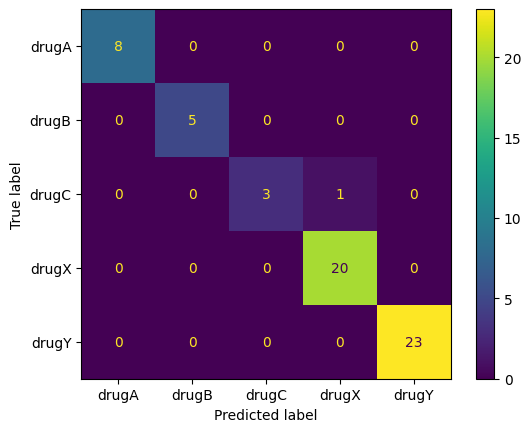

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()
plt.savefig("Results/model_results.png", dpi=120)

In [14]:
! mkdir Model

In [15]:
import skops.io as sio

sio.dump(pipe, "Model/drug_pipeline.skops")

In [18]:
sio.load("Model/drug_pipeline.skops",
         trusted = ['numpy.dtype']) # Has to be a list of strings. Cannot be just set to True.

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('encoder', OrdinalEncoder(),
                                                  [1, 2, 3]),
                                                 ('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  [0, 4]),
                                                 ('num_scaler',
                                                  StandardScaler(), [0, 4])])),
                ('model', RandomForestClassifier(random_state=125))])

In [21]:
! zip -r /content.zip /content

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2025.08.19/ (stored 0%)
  adding: content/.config/logs/2025.08.19/13.37.35.369892.log (deflated 86%)
  adding: content/.config/logs/2025.08.19/13.37.51.363345.log (deflated 57%)
  adding: content/.config/logs/2025.08.19/13.37.26.410292.log (deflated 58%)
  adding: content/.config/logs/2025.0

In [22]:
! cp /content.zip /content